# **Data Collection**

In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vamshi494","key":"75c4c7a41f0042846c1c62ee3dae8baf"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
#! kaggle competitions download -c 'name-of-competition'

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           6107        152  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11594        405  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           3140         56  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Prediction                    81KB  202

In [ ]:
!kaggle datasets download -d sidharkal/sports-image-classification

100% 826M/826M [00:31<00:00, 29.1MB/s]
100% 826M/826M [00:31<00:00, 27.8MB/s]


In [ ]:
# Attaching Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading Dataset from kaggle
!kaggle datasets download -d paultimothymooney/blood-cells

100% 108M/108M [00:03<00:00, 32.3MB/s]
100% 108M/108M [00:03<00:00, 29.2MB/s]


In [ ]:
# Unzipping the file
from zipfile import ZipFile
file_name="/content/sports-image-classification.zip"
with ZipFile(file_name,'r') as t:
  t.extractall()
  print("Done")

Done


In [ ]:
os.makedirs('dataset', exist_ok=True)


In [ ]:
import os
import shutil
import pandas as pd

# Read the train.csv and test.csv files
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

# Get a list of unique category names
categories = train_df['label'].unique()

# Create the new directory structure

os.makedirs('dataset0/train', exist_ok=True)
os.makedirs('dataset0/test', exist_ok=True)

for category in categories:
    os.makedirs(f'dataset0/train/{category}', exist_ok=True)
    os.makedirs(f'dataset0/test/{category}', exist_ok=True)

# Move the images to their corresponding category subfolders
for index, row in train_df.iterrows():
    filename = row['image_ID']
    category = row['label']
    src_path = f'dataset/train/{filename}'
    dst_path = f'dataset0/train/{category}/{filename}'
    shutil.move(src_path, dst_path)

for index, row in test_df.iterrows():
    filename = row['image_ID']
    category = row['label']
    src_path = f'dataset/test/{filename}'
    dst_path = f'dataset0/test/{category}/{filename}'
    shutil.move(src_path, dst_path)


KeyError: ignored

In [ ]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Libraries**

In [ ]:
from PIL import Image
from typing import Type, Any, Callable, Union, List, Optional
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
## PyTorch
import torch
from torch import Tensor
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD, Adam
## PyTorch lightning
import pytorch_lightning as pl
import torchmetrics
# Torchvision
import torchvision
from torchvision import models
from torchvision import transforms
from torchmetrics.functional import accuracy
# import TensorBoardLogger
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# **Loading and Preprocessing the data**

In [ ]:
def load_data(phase):
    transform_dict = {
        'src': transforms.Compose(
        [transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ]),
        'tar': transforms.Compose(
        [transforms.Resize(224),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])}
    data = torchvision.datasets.ImageFolder("/content/dataset0/train", transform=transform_dict[phase])
    #data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=4)
    return data

In [ ]:
Train_dataset = load_data('src')
print(len(Train_dataset))
num_imgs=len(Train_dataset)

8227


In [ ]:
Test_dataset = load_data('tar')
print(len(Test_dataset))
num_imgs1=len(Test_dataset)

2487


In [ ]:
train_length = int(0.85*num_imgs)
val_length = int(0.15*num_imgs)+1
#test_length = num_imgs - train_length - val_length
print(train_length, val_length)

6992 1235


In [ ]:
train_set,val_set = data.random_split(Train_dataset, [train_length, val_length])
train_loader = data.DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
val_loader = data.DataLoader(val_set, batch_size=32, shuffle=False, drop_last=False, num_workers=4)
#test_loader = data.DataLoader(Test_dataset, batch_size=32, shuffle=False, drop_last=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([32, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [ ]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(4, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels= next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

In [ ]:
for i in range(4):
    show_batch_images(train_loader)

# **Model**

In [ ]:
class ResNetClassifier(pl.LightningModule):
    def __init__(self, num_classes=7, resnet_version=18, 
                optimizer='adam', lr=0.001,
                transfer=True, tune_fc_only=True):
        super().__init__()
        self.__dict__.update(locals())
        resnets = {
            18: models.resnet18, 34: models.resnet34,
            50: models.resnet50, 101: models.resnet101,
            152: models.resnet152
        }
        optimizers = {'adam': Adam, 'sgd': SGD}
        #self.accuracy = torchmetrics.Accuracy(task='multiclass',num_classes=num_classes)
        self.optimizer = optimizers[optimizer]
        self.criterion = nn.BCEWithLogitsLoss() if num_classes == 2 else nn.CrossEntropyLoss()
        self.resnet_model = resnets[resnet_version](pretrained=transfer)
        linear_size = list(self.resnet_model.children())[-1].in_features
        self.resnet_model.fc = nn.Linear(linear_size, num_classes)
        if tune_fc_only:
            for child in list(self.resnet_model.children())[:-1]:
                for param in child.parameters():
                    param.requires_grad = False

    def forward(self, X):
        return self.resnet_model(X)

    def configure_optimizers(self):
        return self.optimizer(self.parameters(), lr=self.lr)
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        if self.num_classes == 2:
            y = F.one_hot(y, num_classes=2).float()
        
        loss = self.criterion(preds, y)
        #acc = self.accuracy(preds, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        #self.log("train_acc", acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        if self.num_classes == 2:
            y = F.one_hot(y, num_classes=2).float()
        
        loss = self.criterion(preds, y)
        #acc = self.accuracy(preds, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True, logger=True)
        #self.log("val_acc", acc, on_epoch=True, prog_bar=True, logger=True)
 
    def test_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        if self.num_classes == 2:
            y = F.one_hot(y, num_classes=2).float()
        
        loss = self.criterion(preds, y)
        #acc = self.accuracy(preds, y)
        self.log("test_loss", loss, on_step=True, prog_bar=True, logger=True)
        #self.log("test_acc", acc, on_step=True, prog_bar=True, logger=True)


In [ ]:
num_classes=7
model=18
optimizer='adam'
learning_rate=0.01
Pre_trained=True
num_epochs=50

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model=ResNetClassifier()
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
logger = TensorBoardLogger("lightning_logs", name="sports_classification")
checkpoint_callback = ModelCheckpoint(
  dirpath="/content/checkpoints",
  filename="best-checkpoint",
  save_top_k=1,
  verbose=True,
  monitor="val_loss",
  mode="min"
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
trainer = pl.Trainer(
  logger=logger,
  callbacks=[checkpoint_callback],
  max_epochs=num_epochs,
  #progress_bar_refresh_rate=30
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


# **Model Training and Validation**

In [ ]:
trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params
--------------------------------------------------
0 | criterion    | CrossEntropyLoss | 0     
1 | resnet_model | ResNet           | 11.2 M
--------------------------------------------------
3.6 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.720    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 218: 'val_loss' reached 0.74254 (best 0.74254), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 436: 'val_loss' reached 0.60386 (best 0.60386), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 654: 'val_loss' reached 0.56900 (best 0.56900), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 872: 'val_loss' reached 0.52567 (best 0.52567), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 1090: 'val_loss' reached 0.51210 (best 0.51210), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 1308: 'val_loss' reached 0.49183 (best 0.49183), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 1526: 'val_loss' reached 0.47405 (best 0.47405), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 1744: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 1962: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 2180: 'val_loss' reached 0.46211 (best 0.46211), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 2398: 'val_loss' was not in top 1


In [ ]:
trainer.validate(dataloaders=val_loader)
#trainer.test(dataloaders=test_loader)

# **Model Evaluation**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/lightning_logs

In [ ]:
model_path = checkpoint_callback.best_model_path
model_path

In [ ]:
trained_model = ResNetClassifier.load_from_checkpoint(model_path)
#trained_model.eval()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model = trained_model.to(device) # moving model to cuda
model.eval()

pred_outs, true_labels = [], []
for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_labels = batch
 
    with torch.no_grad():
        pred_out = model(b_input_ids)
        pred_out = torch.sigmoid(pred_out)
        pred_out = pred_out.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
    pred_outs.append(pred_out)
    true_labels.append(label_ids)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
flat_pred_outs = np.concatenate(pred_outs, axis=0)
y_true = np.concatenate(true_labels, axis=0)

In [ ]:
flat_pred_outs.shape , y_true.shape

((2487, 4), (2487,))

In [ ]:
y_pred=flat_pred_outs.argmax(axis=1)

In [ ]:
print(flat_pred_outs)

[[8.85589182e-01 1.47008998e-02 4.02746685e-02 2.52739519e-01]
 [8.15881729e-01 2.66310526e-03 9.04954597e-02 4.52986985e-01]
 [9.86105382e-01 1.37519406e-03 1.16915871e-05 7.28825927e-02]
 ...
 [6.18374169e-01 5.65930456e-03 1.66645143e-04 9.66515124e-01]
 [1.27120543e-07 1.33938665e-05 3.80681723e-01 9.99967456e-01]
 [4.09919880e-02 4.45202691e-04 5.21318708e-03 9.96656537e-01]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       623
           1       1.00      0.88      0.94       620
           2       0.85      0.75      0.79       620
           3       0.72      0.92      0.80       624

    accuracy                           0.86      2487
   macro avg       0.87      0.86      0.86      2487
weighted avg       0.87      0.86      0.86      2487



In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix=confusion_matrix(y_true, y_pred)

In [ ]:
class_names=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

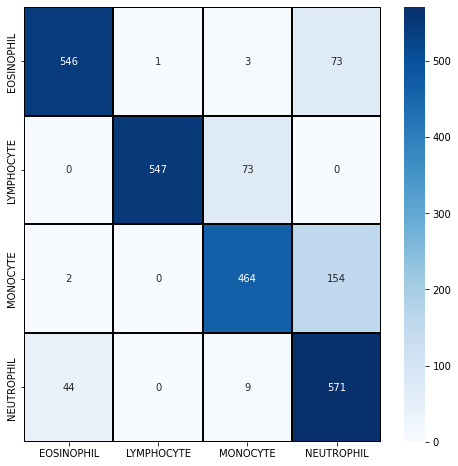

In [ ]:
def plot_confusion_matrix (cm):
    plt.figure(figsize = (8,8))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(confusion_matrix)

In [ ]:
def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

# **Interference**

LYMPHOCYTE  at confidence score:0.99


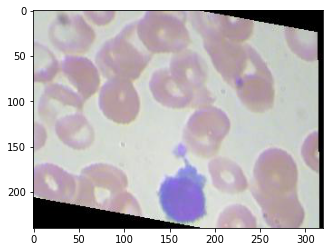

In [ ]:
#model = torch.load(PATH)
#model.eval()
import io
def get_prediction(image_bytes):
    tensor = transform_image(image_bytes=image_bytes)
    tensor=tensor.to(device)
    output = model.forward(tensor)
    
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, classes = torch.max(probs, 1)
    return conf.item(), class_names[classes.item()]

image_path="/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/_0_1072.jpeg"
image = plt.imread(image_path)
plt.imshow(image)

with open(image_path, 'rb') as f:
    image_bytes = f.read()

    conf,y_pre=get_prediction(image_bytes=image_bytes)
    print(y_pre, ' at confidence score:{0:.2f}'.format(conf))